## Chapter 3

#### Structure

##### Cliques and Communites:

- pathfinding and finding neighbors
- What is clique? : Narrow exclusive circle or bunch of people who know each other
    - tightly knit-group
- Network Cliques - Complety connected graph.
- Simplest Complex Clique - Triangle (Edges connected in triangle)
- Triangle applications
    - Freind recommendation systems
    - Linkedin, Facebook
    

Nodes of graph: 
['Toronto', 'London', 'Berlin', 'New York', 'New Delhi', 'Amsterdam']
Edges of graph: 
[('Toronto', 'London'), ('London', 'Berlin'), ('Berlin', 'New York'), ('New York', 'New Delhi'), ('New Delhi', 'Amsterdam')]
Combinations n1 and n2: 1 ('Toronto', 'London')
Combinations n1 and n2: 2 ('Toronto', 'Berlin')
Combinations n1 and n2: 3 ('Toronto', 'New York')
Combinations n1 and n2: 4 ('Toronto', 'New Delhi')
Combinations n1 and n2: 5 ('Toronto', 'Amsterdam')
Combinations n1 and n2: 6 ('London', 'Berlin')
Combinations n1 and n2: 7 ('London', 'New York')
Combinations n1 and n2: 8 ('London', 'New Delhi')
Combinations n1 and n2: 9 ('London', 'Amsterdam')
Combinations n1 and n2: 10 ('Berlin', 'New York')
Combinations n1 and n2: 11 ('Berlin', 'New Delhi')
Combinations n1 and n2: 12 ('Berlin', 'Amsterdam')
Combinations n1 and n2: 13 ('New York', 'New Delhi')
Combinations n1 and n2: 14 ('New York', 'Amsterdam')
Combinations n1 and n2: 15 ('New Delhi', 'Amsterdam')


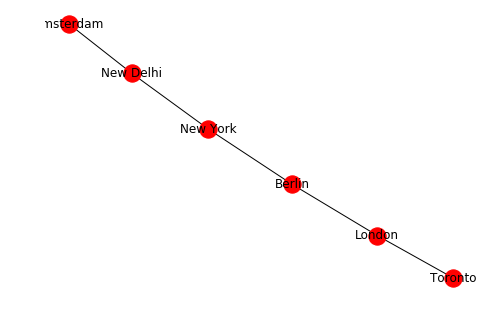

In [36]:
# Clique Code

import networkx as nx
import matplotlib.pyplot as plt

# from itertools import combinations
from itertools import combinations

# Make graph with by random countries and it's capitals
G=nx.path_graph(["Canada","UK","Germany","USA","India","Netherlands"])
cities = {"Canada":"Toronto",
          "UK":"London", 
          "Germany":"Berlin",
          "USA":"New York", 
          "India":"New Delhi",
          "Netherlands":"Amsterdam"}

# Combine the graphs
H=nx.relabel_nodes(G,cities)
print("Nodes of graph: ")
print(H.nodes())
print("Edges of graph: ")
print(H.edges())

# make a combination
k = 0
for n1, n2 in combinations(H.nodes(), 2):
    k = k + 1
    print('Combinations n1 and n2:',  k , (n1,n2))

nx.draw(H, with_labels=True)
plt.show()

Identifying triangle relationships
Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

In [ ]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

Finding nodes involved in triangles
NetworkX provides an API for counting the number of triangles that every node is involved in: nx.triangles(G). It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

In [ ]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35

Finding open triangles
Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

In [ ]:

from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

#### Maximal Cliques
- Maximal Cliques: a clique that, when extended by one node is no longer a clique.
    - Can be used in community finding applications
    - Communities: Sub-graphs with in larger graph
    - Find Unions of cliques.

##### Networkx API
- find_cliques finds all maximal cliques


<generator object find_cliques at 0xa188a9b10>
[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]


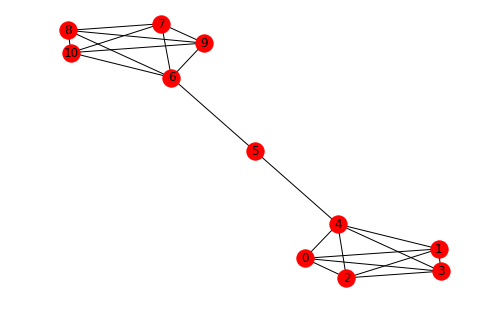

In [34]:
# Barbell graph example

import networkx as nx
import matplotlib.pyplot as plt

# Define graph
G = nx.barbell_graph(m1=5, m2=1)

# find the cliques (find_cliques)
print(nx.find_cliques(G))
print(list(nx.find_cliques(G)))

# Draw Graph and show
nx.draw(G, with_labels=True)
plt.show()


Finding all maximal cliques of size "n"
Now that you've explored triangles (and open triangles), let's move on to the concept of maximal cliques. Maximal cliques are cliques that cannot be extended by adding an adjacent edge, and are a useful property of the graph when finding communities. NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: nx.find_cliques(G). Play around with the function by using it on T in the IPython Shell, and then try answering the exercise.

In [ ]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33


#### Subgraphs
- Visualize portions of a large graph
    - Paths.
    - Communities/cliques
    - Degrees of separation from a node


Number of Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Number of edges: [(0, 1), (0, 6), (0, 12), (0, 17), (0, 18), (0, 19), (1, 3), (1, 9), (1, 15), (1, 17), (1, 18), (2, 10), (2, 14), (3, 4), (3, 5), (3, 13), (3, 14), (4, 13), (4, 15), (4, 19), (5, 6), (5, 8), (5, 11), (5, 12), (5, 16), (6, 7), (6, 9), (6, 18), (7, 12), (7, 17), (8, 15), (8, 16), (9, 14), (9, 15), (9, 16), (9, 18), (10, 12), (10, 14), (10, 16), (11, 12), (11, 16), (12, 13), (13, 17), (13, 19), (14, 17), (14, 19), (15, 19), (17, 19), (18, 19)]
Number of edges in number: 49
Nodes: <dict_keyiterator object at 0xa18ad68b8>


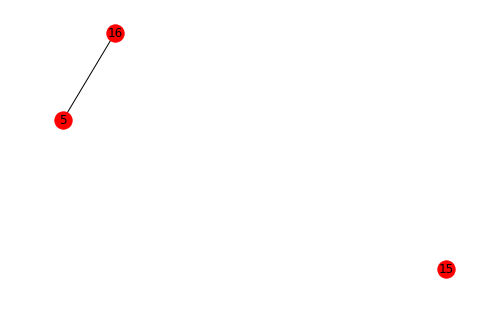

In [33]:
# Example Subgraphs
import networkx as nx

# assign to erdos_renyi_graph function, n = nodes, and probability  = 0.2
G = nx.erdos_renyi_graph(n=20, p=0.2)

# See the nodes
print('Number of Nodes:', G.nodes())

# See the number of edges
print("Number of edges:", G.edges())
print("Number of edges in number:", len(G.edges()))

# See the neighbors
nodes = G.neighbors(8)
print("Nodes:", nodes)

# To see the sub-graph of nodes
# nodes.append(8)

# Subgraph function G.subgraph(nodes)
G_eight = G.subgraph(nodes)

# check the nodes of G_eight
G_eight.edges()

# Draw the graph of the subgraph
nx.draw(G_eight, with_labels=True)


Subgraphs I
There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using G.subgraph(nodes), which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

matplotlib.pyplot has been imported for you as plt.

In [ ]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

Exercise
Exercise
Subgraphs II
In the previous exercise, we gave you a list of nodes whose neighbors we asked you to extract.

Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes. The exercise will also build your capacity to compose functions that you've already written before.

In [ ]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()

Finding important collaborators
Almost there! You'll now look at important nodes once more. Here, you'll make use of the degree_centrality() and betweenness_centrality() functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.